# Яблоко

### Указать пути до папки с картинками и папки вывода, а также первый и последний кадры включительно
### Specify the paths to the folder with images and the output folder, as well as the first and last frames number (include borders)
### Geben Sie die Pfade zum Ordner mit Bildern und zum Ausgabeordner sowie die Nummer des ersten und letzten Bildes an (einschließlich Rahmen).
frames here: https://disk.yandex.ru/d/7FR-UM1BKMAoCA

In [33]:
# со слешем, обязательно
# with slash required
# mit Schrägstrich erforderlich
input_path = "C:/Users/razch/Documents/bad_apple/" 
output_path = "C:/Users/razch/Documents/frames/"

start_frame = 4213
end_frame = 4213

Дальше ничего менять не нужно</br>
Nothing further needs to be changed</br>
Es muss nichts weiter geändert werden

In [34]:
from PIL import Image
import numpy as np
import math
import matplotlib.pyplot as plt

'''
0->
|    image[y][x]
v
'''
# загружаем кортиночки. каждый их элемент это
# текстура - (r, g, b), где они от 0 до 255
# карта высот - double от 0 до 1


f_id = "0"*(4-len(str(start_frame))) + str(start_frame)
texture = np.array(Image.open(f"{input_path}apple{f_id}.png").convert("RGB"))
heightmap = np.zeros((360, 480))
print(texture.shape)
for x in range(480):
    for y in range(360):
        heightmap[y][x] = texture[y][x][0] / 256.0

# это будет наше окно итоговое
viewport = np.zeros((420, 640, 3), dtype=np.uint8)

# это для вида лучей сверху
raycast = texture.copy()

(360, 480, 3)


In [35]:
def updateMaps(file, texture, heightmap):
    file = np.array(Image.open(file).convert("RGB"))
    for x in range(480):
        for y in range(360):
            texture[y][x] = file[y][x]
            heightmap[y][x] = texture[y][x][0] / 256.0
    

In [36]:
# рисует полоску на вьюпорте canvas, цвета color, одну из screen_width (кол-во лучей) начиная с заданных координат и вниз
def draw_strip(canvas, color, start_y, start_x, screen_width):
    height, width, _ = canvas.shape
    start_y = max(0, start_y)
    for x in range(start_x, min(width, start_x + math.ceil(width/screen_width))):
        for y in range(start_y, height):
            canvas[y][x] = color

In [37]:
# функция для выпрямления плоскости
def linear_to_non(value):
    return value ** 0.5
    #return (1-(value-1)**2)**0.5

# отрисовка окна зрения, по сути рендер
def draw_plane(canvas, x, y, screen_width, z, horizon, texture, heightmap, flat=True, minimap=None):
    
    # закрашиваем изначально все голубым
    sky = (0, 0, 0)
    height, width, _ = canvas.shape

    screen_width = min(width, screen_width)
    # размеры карты
    dimens = heightmap.shape
    
    #plane = np.zeros((z, screen_width, 3), dtype=np.uint8)
    for xx in range(width):
        for yy in range(height):
            canvas[yy][xx] = sky
            
    # так же кидаем лучи, теперь не просто для их отображения, но и для построения картинки
    lp = [x-z, y-z]
    rp = [x+z, y-z]
    dx = round(abs(rp[0]-lp[0]) / screen_width)
    rays_x = list(range(lp[0], rp[0], dx))
    
    # фиксировать цвет будем только то количество раз, сколько пикселей в кадре без горизона
    for start_y in range(horizon, height):
        #n += 1
        
        # находим слой для луча на карте, который будет соответствовать этому ряду в картинке
        yy = y-z + round(((start_y - horizon) / (height-horizon)) ** 0.5 * z)
        for i in range(len(rays_x)):
            
            ray_x = rays_x[i]
            
            # находим пересечение луча со слоем. Проверяем выход за границы
            xx = round(((yy - lp[1]) * (x - ray_x) / (y - lp[1])) + ray_x)
            if (yy >= 0) and (yy < dimens[0]) and (xx >= 0) and (xx < dimens[1]):
                
                color = texture[yy][xx]
            
                # добавка высоты по карте высот для пикселя
                extra_h = 0
                extra_h = round(-(heightmap[yy][xx]) * 50) * (not flat)
                
                # отрисовка полоски
                draw_strip(canvas, color, start_y - extra_h, math.floor(i * width / screen_width), screen_width)
                if not minimap is None:
                    minimap[yy][xx] = (255, 0, 0)

In [38]:
print("In progress...")
for i in range(start_frame, end_frame+1, 1):
    id = "0"*(4-len(str(i))) + str(i)
    updateMaps(f"{input_path}apple{id}.png", texture, heightmap)
    draw_plane(canvas=viewport, x=240, y=370, screen_width=1000, z=400, horizon=10, texture=texture, heightmap=heightmap, flat=False)
    Image.fromarray(viewport).save(f"{output_path}frame{id}.png")
    print(id)

In progress...
4213


# Ну хотите запустите, это просто 1 кадр

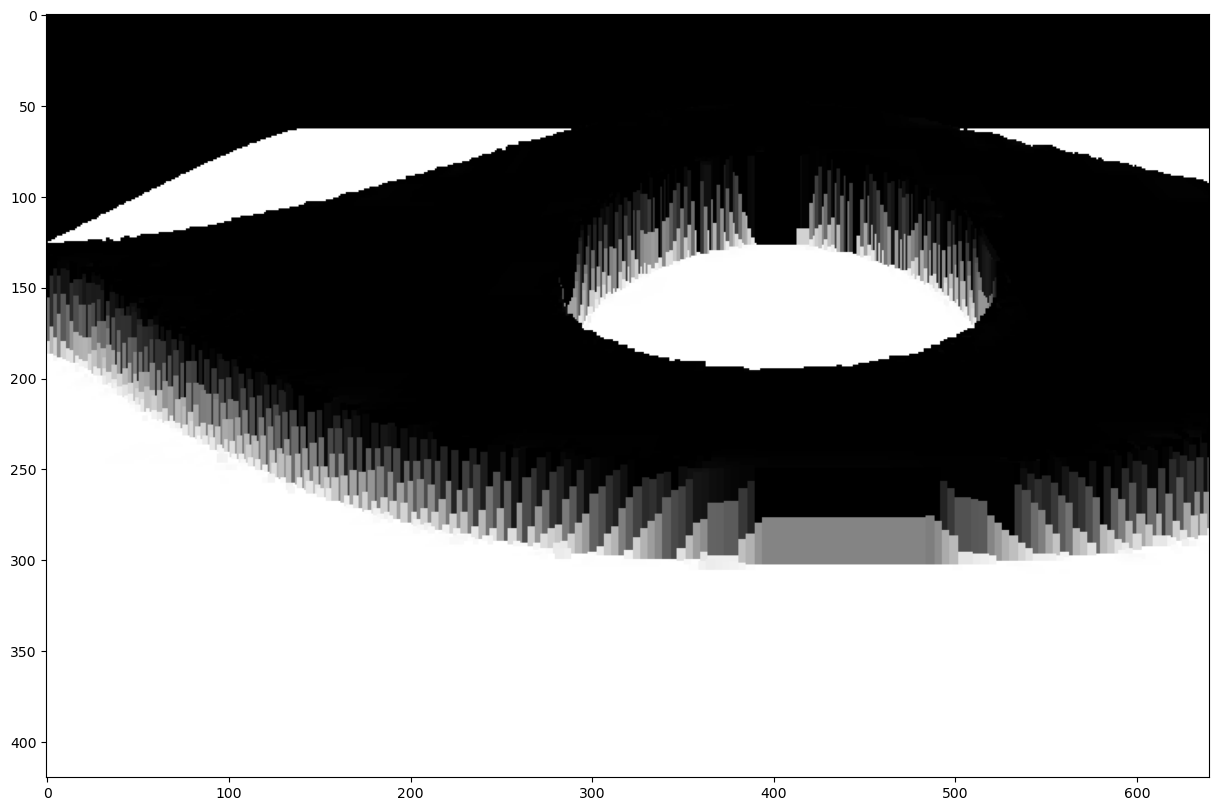

In [41]:
draw_plane(canvas=viewport, x=240, y=370, screen_width=1000, z=400, horizon=10, texture=texture, heightmap=heightmap, flat=False, minimap=raycast)
fig = plt.figure(figsize=(15, 10))
plt.imshow(viewport)
plt.show()

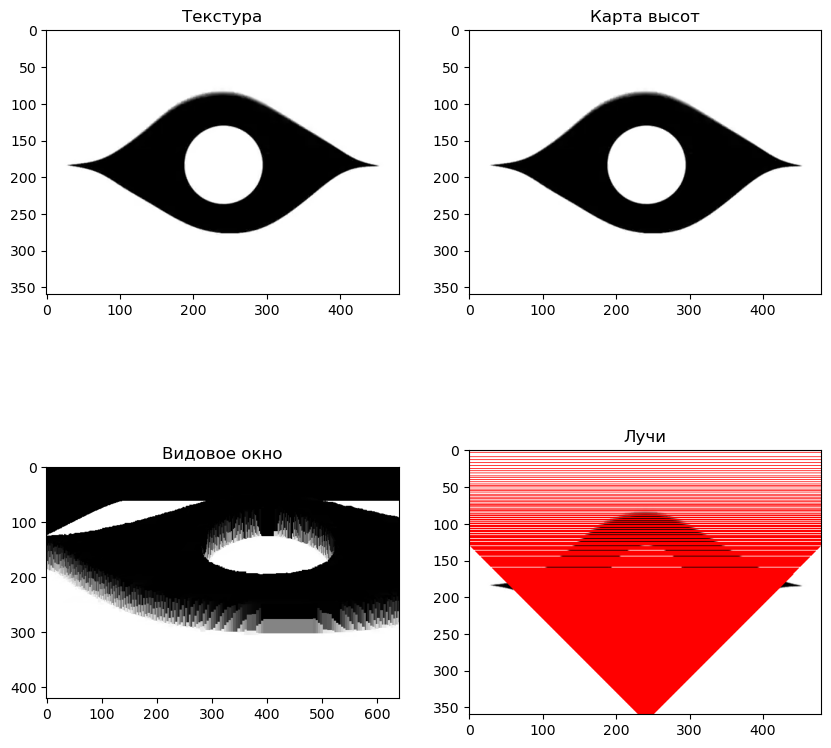

Thank you, comrade!


In [42]:
# ну и куда же без общего вывода
fig, ((texture_fig, heightmap_fig), (viewport_fig, raycast_fig)) = plt.subplots(2, 2, figsize=(10, 10))

texture_fig.imshow(texture)
texture_fig.set_title('Текстура')

heightmap_fig.imshow(heightmap, cmap='gray')
heightmap_fig.set_title('Карта высот')

viewport_fig.imshow(viewport)
viewport_fig.set_title('Видовое окно')

raycast_fig.imshow(raycast)
raycast_fig.set_title('Лучи')

plt.show()

print("Thank you, comrade!")